### Actividad: Predicción de quiebras bancarias en Estados Unidos

##### Objetivo:

Aplicación de un modelo de regresión logística y un modelo Random Forest para predecir si un banco está en riesgo de declararse en bancarrota. 

In [206]:
# Importación de Paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

#### Carga de datos

In [208]:
default = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/CUA Caso Práctico/us_failures.csv")
default.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [209]:
# company_name como indice

default.set_index("company_name",inplace=True)
default.head()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


#### Descripción y visualización de los datos

In [211]:
# Nombre de las variables

default.columns

Index(['status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')

In [212]:
# Descriptivos del DataFrame

default.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


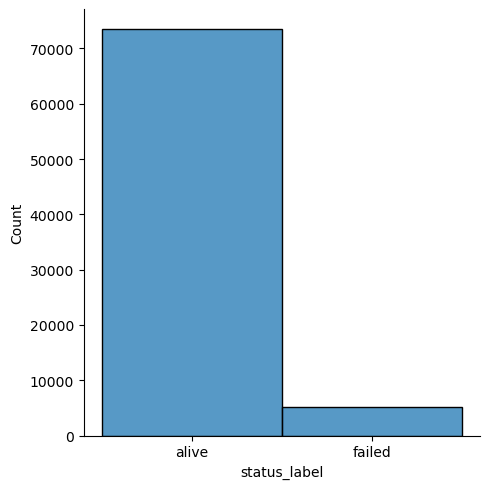

In [213]:
# Distribución de la variable status_label, la que queremos predecir

sns.displot(default["status_label"])
plt.show()

Como podemos osbervar, la mayoria de empresas del DataFrame tienen la condición de "alive"

In [215]:
# Correlación de las variables numéricas

default_num = default.drop("status_label",axis=1)
default_num.corr()


,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
year,1.000000,0.096764,0.065320,0.078040,0.082694,0.073918,0.063232,0.082141,0.080689,0.075471,0.100649,0.121160,0.077256,0.084388,0.085043,0.052765,0.075471,0.104300,0.070588
X1,0.096764,1.000000,0.660564,0.659173,0.812872,0.638698,0.657366,0.851945,0.826568,0.758712,0.824172,0.641522,0.806540,0.839140,0.903493,0.549777,0.758712,0.794479,0.713187
X2,0.065320,0.660564,1.000000,0.601328,0.674880,0.780846,0.517079,0.662863,0.556610,0.975963,0.681138,0.479374,0.646028,0.723855,0.784213,0.593223,0.975963,0.657386,0.988994
X3,0.078040,0.659173,0.601328,1.000000,0.853222,0.426229,0.534297,0.696474,0.668160,0.700824,0.911330,0.781753,0.712093,0.796021,0.752106,0.588563,0.700824,0.877051,0.639004
X4,0.082694,0.812872,0.674880,0.853222,1.000000,0.512667,0.766148,0.779820,0.859896,0.796124,0.916728,0.730642,0.973745,0.923711,0.835342,0.674287,0.796124,0.865836,0.719960
X5,0.073918,0.638698,0.780846,0.426229,0.512667,1.000000,0.395436,0.503019,0.483074,0.791135,0.553202,0.415740,0.504091,0.657215,0.719630,0.436993,0.791135,0.557678,0.808342
X6,0.063232,0.657366,0.517079,0.534297,0.766148,0.395436,1.000000,0.588943,0.714706,0.606444,0.646947,0.434078,0.798147,0.696554,0.637441,0.628653,0.606444,0.587707,0.547576
X7,0.082141,0.851945,0.662863,0.696474,0.779820,0.503019,0.588943,1.000000,0.684549,0.726521,0.806388,0.645599,0.745765,0.731790,0.872734,0.570250,0.726521,0.807136,0.682650
X8,0.080689,0.826568,0.556610,0.668160,0.859896,0.483074,0.714706,0.684549,1.000000,0.685420,0.789200,0.576519,0.865917,0.853052,0.762850,0.629782,0.685420,0.712536,0.620050
X9,0.075471,0.758712,0.975963,0.700824,0.796124,0.791135,0.606444,0.726521,0.685420,1.000000,0.784902,0.581507,0.765814,0.856822,0.858866,0.635692,1.000000,0.754276,0.993149


<Axes: >

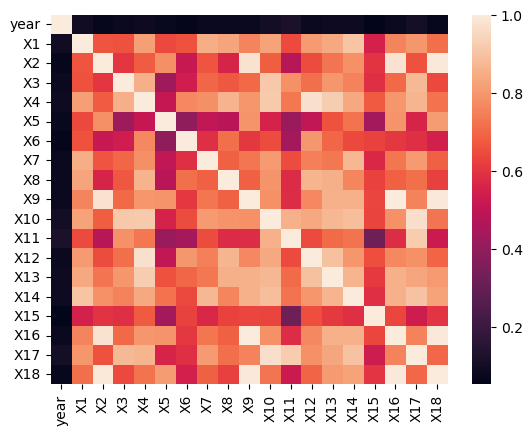

In [216]:
# Mapa de correlaciones
sns.heatmap(default_num.corr())

Podemos observar en el Mapa de Correlaciones ciertas observaciones. En primer lugar, vemos como las variables X2 (Costo de bienes vendidos: Costo total directamente relacionado con la venta de productos), X9 (Ventas netas: Ventas brutas menos devoluciones, bonificaciones y descuentos), X16 (Ingresos Totales: Ingreso total de ventas antes de gastos) y X18 (Gastos Operativos Totales: Gastos de operación del negocio) tienen una estrecha correlación. Esto se debe a que todas las variables están relacionadas con la actividad comercial de la empresa.

En segundo lugar, podemos osbervar también una estrecha correlación entre las variables X12 (EBIT: Ganancias antes de intereses e impuestos) y X4 (EBITDA: Ganancias antes de intereses, impuestos, depreciación y amortización; medida alternativa del rendimiento financiero en comparación con el ingreso neto). Totalmente lógico, pues X12 es el resultado de restarle a X4 la depreciación y amortización.

In [218]:
# Estudiamos si existen valores NA

default.isnull().sum()

status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

No encontramos valores NA

#### Transformación variables categóricas

Debemos transformar las variables categoricas para poder estimar el modelo. Para ello debemos transformar la variable categórica "status_label" a numérica.

In [221]:
status_label = pd.get_dummies(default["status_label"],drop_first=True)
status_label

,failed
company_name,
C_1,False
C_1,False
C_1,False
C_1,False
C_1,False
...,...
C_8971,False
C_8971,False
C_8971,False


Como son variables booleanas, las transformamos a bianrias.

In [223]:
status_label = status_label.astype(int)
status_label

,failed
company_name,
C_1,0
C_1,0
C_1,0
C_1,0
C_1,0
...,...
C_8971,0
C_8971,0
C_8971,0


Podemos observar que las variables cambian a 0 si el banco no ha entrado en bancarrota y 1 si lo ha hecho. 

Ahora debemos juntar el DataFrame "status_label" con el DataFrame numérico para definir el nuevo DataFrame numérico y poder estimar nuestro modelo. 

In [225]:
default = pd.concat([status_label,default_num],axis=1)
default

,failed,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
C_1,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
C_1,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_8971,0,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
C_8971,0,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
C_8971,0,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807


#### Estimación de la Regresión Logística

En primer lugar, debemos separar las variables en explicativas <b>X</b> y explicada <b>y</b> y, además, separar la muestra en un 70% para estimar el modelo y un 30% para evaluarlo. En nuestro caso la variable <b>y</b> es "status_label" y el resto de variables las variables <b>X</b>.

In [228]:
X = default.drop("failed",axis=1)
y = default["failed"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123456789)

In [230]:
# Estimamos el modelo
logit = LogisticRegression()
logit.fit(X_train,y_train)

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
# Obtenemos el intercepto y los coeficientes asociados a las variables

print(logit.intercept_)
logit.coef_

[-5.08977719e-07]


array([[-1.23729847e-03, -4.13266266e-04, -1.51886997e-05,
         1.17851279e-04, -6.12339744e-05,  4.80868679e-04,
        -9.42934426e-05, -1.44404542e-04, -1.65519917e-04,
        -1.69902734e-05, -1.79076984e-06,  8.88977072e-05,
        -1.79054634e-04, -1.80251782e-06,  2.78658889e-04,
        -1.73360245e-05, -1.69902734e-05,  7.95597468e-05,
         4.42140225e-05]])

El modelo estimado es: logit = -5.08977719e-07 + -1.23729847e-03year + -4.13266266e-04X1 + -1.51886997e-05X2 +  1.17851279e-04X3 + -6.12339744e-05X4 + 4.80868679e-04X5 + -9.42934426e-05X6 + -1.44404542e-04X7 + -1.65519917e-04X8 + -1.69902734e-05X9 + -1.79076984e-06X10 + 8.88977072e-05X11 + -1.79054634e-04X12 + -1.80251782e-06X13 + 2.78658889e-04X14 + -1.73360245e-05X15 + -1.69902734e-05X16 + 7.95597468e-05X17 + 4.42140225e-05X18

#### Evaluación del Modelo de Regresión Logistica

In [234]:
predicciones_prob = logit.predict_proba(X_test)
predicciones_prob

array([[0.92214895, 0.07785105],
       [0.91621233, 0.08378767],
       [0.92714502, 0.07285498],
       ...,
       [0.92236625, 0.07763375],
       [0.92400248, 0.07599752],
       [0.92600438, 0.07399562]])

Entendiendo las predicciones, en el primer caso, tiene una probabilidad del 92% de no entrar en bancarrota y un 8% de entrar en bancarrota según nuestro modelo.

In [236]:
predicciones = logit.predict(X_test)
predicciones

array([0, 0, 0, ..., 0, 0, 0])

Por último, calculamos la matriz de confusión, el accuracy, la precisión, el recall, el coeficiente <b>AUC</b> y el <b>gini</b> para evaluar el modelo.

In [238]:
cm

array([[22050,    12],
       [ 1531,    12]], dtype=int64)

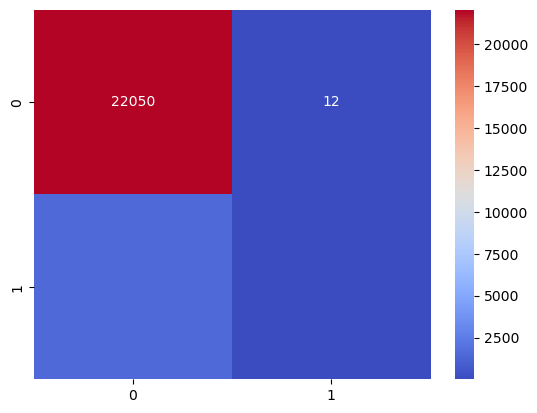

In [239]:
cm = confusion_matrix(y_test,predicciones)
sns.heatmap(cm,annot=True,fmt="d",cmap="coolwarm")
plt.show()

Podemos ver como hay 24 resultados erroneos. 12 falsos negativos y 12 verdaderos negativos. Por lo tanto, no es un mal modelo según la matriz de confusión.

In [241]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     22062
           1       0.50      0.01      0.02      1543

    accuracy                           0.93     23605
   macro avg       0.72      0.50      0.49     23605
weighted avg       0.91      0.93      0.90     23605



Si le echamos un ojo al report clasificatorio, nos damos cuenta que es un modelo sesgado hacia la clase dominante 0. Por lo tanto, deberiamos volver a estimar el modelo reduciendo el tamaño de la clase mayoritaria. 

In [243]:
# Curva ROC

fpr,tpr,umbrales=roc_curve(y_test,predicciones_prob[:,1],pos_label=1)

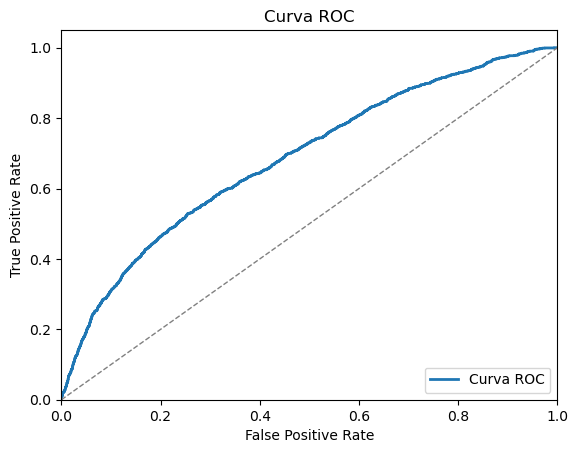

In [244]:
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Interpretando la curva ROC podemos deducir que el modelo no es malo, lo que podría ser mejorable. En la misma línea que con el report clasificatorio. Ahora calculamos el AUC

In [246]:
auc=auc(fpr, tpr)
auc

0.6849930905261805

Tiene una capacidad aceptable para discriminar entre las clases positivas y negativas. Para mejorar la capacidad predictiva podemos usar un Random Forest, vamos a intentarlo.

#### Estimación del Random Forest

In [279]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [286]:
X = default.drop("failed",axis=1)
y = default["failed"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123456789)

In [347]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=123456789 ,max_depth=15, max_features="sqrt",class_weight='balanced')

In [349]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       random_state=123456789)

In [351]:
# Clasificación con el Random Forest

rf_predicciones =rf_model.predict(X_test)
rf_predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [353]:
rf_predicciones_prob =rf_model.predict_proba(X_test)
rf_predicciones_prob

array([[0.55224829, 0.44775171],
       [0.65281072, 0.34718928],
       [0.99283953, 0.00716047],
       ...,
       [0.7275664 , 0.2724336 ],
       [0.98641017, 0.01358983],
       [0.88866481, 0.11133519]])

In [355]:
# Vamos a evaluar cual de las variables tienen mas importancia en la predicción del modelo
rf_model.feature_importances_

array([0.0882782 , 0.05047779, 0.04359   , 0.05839398, 0.04136817,
       0.04555938, 0.07272245, 0.05197017, 0.08176697, 0.03555836,
       0.04615015, 0.05246727, 0.04750238, 0.04694126, 0.04307251,
       0.06011917, 0.036045  , 0.05690667, 0.0411101 ])

#### Evaluación del Random Forest

Al igual que en la regresión logistica, vamos a aplicar las mismas métricas de evaluación.

In [369]:
cm = confusion_matrix(y_test,rf_predicciones)
cm

array([[21304,   758],
       [ 1120,   423]], dtype=int64)

<Axes: >

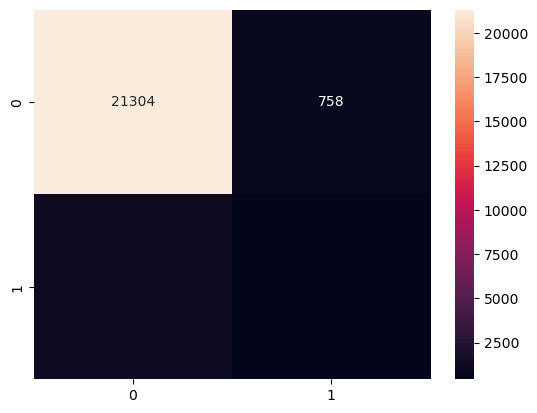

In [371]:
sns.heatmap(cm,annot=True, fmt="d")

In [373]:
print(classification_report(y_test,rf_predicciones))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22062
           1       0.36      0.27      0.31      1543

    accuracy                           0.92     23605
   macro avg       0.65      0.62      0.63     23605
weighted avg       0.91      0.92      0.92     23605



In [376]:
fpr,tpr,umbrales=roc_curve(y_test,rf_predicciones_prob[:,1],pos_label=1)

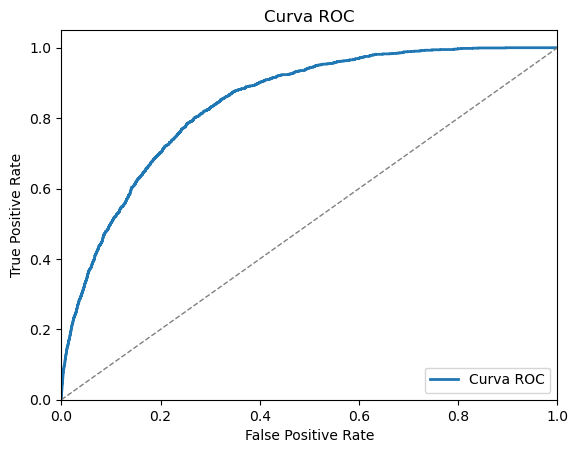

In [378]:
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [380]:
auc=auc(fpr, tpr)
auc

0.842773529356642

### Conclusiones

Según las distintas medidas de evaluación, el Random Forest es mas adecuado que la Regresión Logistica, pues tiene una curva ROC mas buena y un AUC mayor que la regresión logistica. Ahora bien, deberiamos aplicar otro tipo de modelos, pues ambos siguen siendo modelos sesgados hacia la clase dominante, como se puede observar en ambas matrices de confusión.